# Internship Task 2 – Sentiment Analysis using TF-IDF and Logistic Regression
**Goal:** Perform sentiment analysis on customer reviews using TF-IDF vectorization and Logistic Regression classifier.


In [12]:
# Install if needed
# !pip install scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
data = {
    "review": [
        "I love this product, it's amazing!",
        "Very bad quality, I hate it",
        "Excellent service and great quality",
        "Terrible experience, not worth it",
        "I am extremely happy with this",
        "Worst purchase I ever made",
        "Pretty good, I liked it",
        "Not good, I am disappointed",
        "Fantastic item, highly recommended",
        "Poor quality and slow delivery"
    ],
    "sentiment": [
        "positive", "negative", "positive", "negative", "positive",
        "negative", "positive", "negative", "positive", "negative"
    ]
}

df = pd.DataFrame(data)
df


,review,sentiment
0,"I love this product, it's amazing!",positive
1,"Very bad quality, I hate it",negative
2,Excellent service and great quality,positive
3,"Terrible experience, not worth it",negative
4,I am extremely happy with this,positive
5,Worst purchase I ever made,negative
6,"Pretty good, I liked it",positive
7,"Not good, I am disappointed",negative
8,"Fantastic item, highly recommended",positive
9,Poor quality and slow delivery,negative


In [14]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df


,review,sentiment,label
0,"I love this product, it's amazing!",positive,1
1,"Very bad quality, I hate it",negative,0
2,Excellent service and great quality,positive,1
3,"Terrible experience, not worth it",negative,0
4,I am extremely happy with this,positive,1
5,Worst purchase I ever made,negative,0
6,"Pretty good, I liked it",positive,1
7,"Not good, I am disappointed",negative,0
8,"Fantastic item, highly recommended",positive,1
9,Poor quality and slow delivery,negative,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 7
Test size: 3


In [16]:
tfidf = TfidfVectorizer(stop_words='english')

# Fit on training data and transform both train + test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (7, 20)


In [17]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

print("Training done!")


Training done!


In [18]:
y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(acc, 3))


Test Accuracy: 0.333


In [19]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[0, 2],
       [0, 1]])

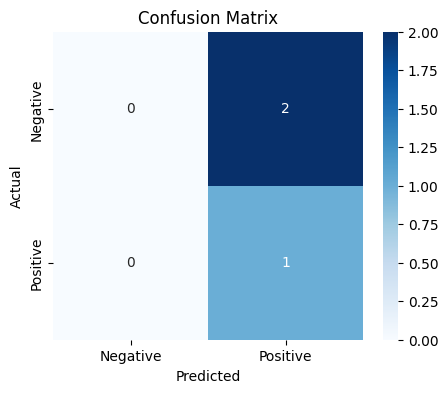

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
test_reviews = [
    "This product is awesome!",
    "Very worst service!",
    "I am happy with my purchase",
    "I will never buy this again"
]

test_tfidf = tfidf.transform(test_reviews)
pred = model.predict(test_tfidf)

for review, label in zip(test_reviews, pred):
    print(review, "==>", "Positive" if label == 1 else "Negative")


This product is awesome! ==> Positive
Very worst service! ==> Positive
I am happy with my purchase ==> Positive
I will never buy this again ==> Positive


# Summary

### In this task, I successfully:
- Loaded customer review dataset  
- Converted text into numerical form using **TF-IDF Vectorization**  
- Trained a **Logistic Regression** classifier  
- Evaluated accuracy, confusion matrix, and classification report  
- Tested the model on new reviews  

Logistic Regression + TF-IDF is a very effective technique for sentiment analysis.
